In [1]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
from collections import Counter
# Importing dependancy libraries
import os
import pandas as pd
import numpy as np
import re
import math as m
import nltk
nltk.download('stopwords')
from collections import Counter
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
# sorted(stop_list)
from nltk import TreebankWordTokenizer
from sys import version_info
import argparse
import json
import matplotlib
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm


from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install textblob

In [3]:
!unzip /content/Cranfield_Dataset.zip

Archive:  /content/Cranfield_Dataset.zip
   creating: cranfield/
  inflating: cranfield/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/cranfield/
  inflating: __MACOSX/cranfield/._.DS_Store  
  inflating: cranfield/cran_queries.json  
  inflating: __MACOSX/cranfield/._cran_queries.json  
  inflating: cranfield/cran_qrels.json  
  inflating: __MACOSX/cranfield/._cran_qrels.json  
  inflating: cranfield/cran_docs.json  
  inflating: __MACOSX/cranfield/._cran_docs.json  
  inflating: cranfield/README.txt    
  inflating: __MACOSX/cranfield/._README.txt  


In [4]:
%cd /content/cranfield

/content/cranfield


#Function for different Evaluation Measures

In [5]:
import math


# Add your import statements here


class Evaluation():

    def queryPrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The precision value as a number between 0 and 1
        """

        precision = 0

        # Fill in code here
        # precision@k is number of relevant docs encountered till top k
        # docs in the retrieved
        count = 0
        # to keep track of the relevant doc encountered
        i = 0
        while (i < k):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        precision = count / k

        return precision

    def meanPrecision(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean precision value as a number between 0 and 1
        """

        meanPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryPrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanPrecision = total_precision / count

        return meanPrecision

    def queryRecall(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The recall value as a number between 0 and 1
        """

        recall = -1

        # Fill in code here
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        if len(true_doc_IDs) > 0:
            recall = count / len(true_doc_IDs)
        else:
            recall = 1

        return recall

    def meanRecall(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean recall value as a number between 0 and 1
        """

        meanRecall = -1

        # Fill in code here
        total_recall = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_recall = total_recall + self.queryRecall(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanRecall = total_recall / count

        return meanRecall

    def queryFscore(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The fscore value as a number between 0 and 1
        """

        fscore = -1

        # Fill in code here
        Precision_at_k = -1
        Recall_at_k = -1
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        Precision_at_k = count / k
        Recall_at_k = count / len(true_doc_IDs)
        if Precision_at_k + Recall_at_k > 0:
            fscore = 2 * Precision_at_k * Recall_at_k / (Precision_at_k + Recall_at_k)
        else:
            fscore = 0

        return fscore

    def meanFscore(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean fscore value as a number between 0 and 1
        """

        meanFscore = -1

        # Fill in code here
        count = 0
        total_Fscore = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_Fscore = total_Fscore + self.queryFscore(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanFscore = total_Fscore / count

        return meanFscore

    def queryNDCG(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of nDCG of the Information Retrieval System
        at given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The nDCG value as a number between 0 and 1
        """

        nDCG = -1

        # Fill in code here
        i = 0
        j = 0
        DCG = 0
        best_order = []
        while i < k:
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                DCG = DCG + true_doc_IDs[query_doc_IDs_ordered[i]] / math.log((i + 2), 2)
                best_order.append(true_doc_IDs[query_doc_IDs_ordered[i]])
            i = i + 1
        best_order.sort(reverse=True)
        iDCG = 0
        while j < len(best_order):
            iDCG = iDCG + best_order[j] / math.log((j + 2), 2)
            j = j + 1
        if iDCG > 0:
            nDCG = DCG / iDCG
        else:
            nDCG = 0

        return nDCG

    def meanNDCG(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of nDCG of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean nDCG value as a number between 0 and 1
        """

        meanNDCG = -1

        # Fill in code here
        totalNDCG = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = {}
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs[int(dic["id"])] = 5 - int(dic["position"])
                elif flag == 1:
                    break
            totalNDCG = totalNDCG + self.queryNDCG(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanNDCG = totalNDCG / count

        return meanNDCG

    def queryAveragePrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of average precision of the Information Retrieval System
        at a given value of k for a single query (the average of precision@i
        values for i such that the ith document is truly relevant)

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The average precision value as a number between 0 and 1
        """

        avgPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        i = 0
        while i < k :
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                total_precision = total_precision + ((count + 1) / (i + 1))
                count = count + 1
            i = i + 1
        if count > 0:
            avgPrecision = total_precision / count
        else:
            avgPrecision = 0

        return avgPrecision

    def meanAveragePrecision(self, doc_IDs_ordered, query_ids, q_rels, k):
        """
        Computation of MAP of the Information Retrieval System
        at given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The MAP value as a number between 0 and 1
        """

        meanAveragePrecision = -1

        # Fill in code here
        total_precision = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in q_rels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryAveragePrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanAveragePrecision = total_precision / count

        return meanAveragePrecision


In [6]:
import math


# Add your import statements here


class Evaluation():

    def queryPrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The precision value as a number between 0 and 1
        """

        precision = 0

        # Fill in code here
        # precision@k is number of relevant docs encountered till top k
        # docs in the retrieved
        count = 0
        # to keep track of the relevant doc encountered
        i = 0
        while (i < k):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        precision = count / k

        return precision

    def meanPrecision(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean precision value as a number between 0 and 1
        """

        meanPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryPrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanPrecision = total_precision / count

        return meanPrecision

    def queryRecall(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The recall value as a number between 0 and 1
        """

        recall = -1

        # Fill in code here
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        if len(true_doc_IDs) > 0:
            recall = count / len(true_doc_IDs)
        else:
            recall = 1

        return recall

    def meanRecall(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean recall value as a number between 0 and 1
        """

        meanRecall = -1

        # Fill in code here
        total_recall = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_recall = total_recall + self.queryRecall(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanRecall = total_recall / count

        return meanRecall

    def queryFscore(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The fscore value as a number between 0 and 1
        """

        fscore = -1

        # Fill in code here
        Precision_at_k = -1
        Recall_at_k = -1
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        Precision_at_k = count / k
        Recall_at_k = count / len(true_doc_IDs)
        if Precision_at_k + Recall_at_k > 0:
            fscore = 2 * Precision_at_k * Recall_at_k / (Precision_at_k + Recall_at_k)
        else:
            fscore = 0

        return fscore

    def meanFscore(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean fscore value as a number between 0 and 1
        """

        meanFscore = -1

        # Fill in code here
        count = 0
        total_Fscore = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_Fscore = total_Fscore + self.queryFscore(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanFscore = total_Fscore / count

        return meanFscore

    def queryNDCG(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of nDCG of the Information Retrieval System
        at given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The nDCG value as a number between 0 and 1
        """

        nDCG = -1

        # Fill in code here
        i = 0
        j = 0
        DCG = 0
        best_order = []
        while i < k:
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                DCG = DCG + true_doc_IDs[query_doc_IDs_ordered[i]] / math.log((i + 2), 2)
                best_order.append(true_doc_IDs[query_doc_IDs_ordered[i]])
            i = i + 1
        best_order.sort(reverse=True)
        iDCG = 0
        while j < len(best_order):
            iDCG = iDCG + best_order[j] / math.log((j + 2), 2)
            j = j + 1
        if iDCG > 0:
            nDCG = DCG / iDCG
        else:
            nDCG = 0

        return nDCG

    def meanNDCG(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of nDCG of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean nDCG value as a number between 0 and 1
        """

        meanNDCG = -1

        # Fill in code here
        totalNDCG = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = {}
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs[int(dic["id"])] = 5 - int(dic["position"])
                elif flag == 1:
                    break
            totalNDCG = totalNDCG + self.queryNDCG(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanNDCG = totalNDCG / count

        return meanNDCG

    def queryAveragePrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of average precision of the Information Retrieval System
        at a given value of k for a single query (the average of precision@i
        values for i such that the ith document is truly relevant)

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The average precision value as a number between 0 and 1
        """

        avgPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        i = 0
        while i < k :
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                total_precision = total_precision + ((count + 1) / (i + 1))
                count = count + 1
            i = i + 1
        if count > 0:
            avgPrecision = total_precision / count
        else:
            avgPrecision = 0

        return avgPrecision

    def meanAveragePrecision(self, doc_IDs_ordered, query_ids, q_rels, k):
        """
        Computation of MAP of the Information Retrieval System
        at given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The MAP value as a number between 0 and 1
        """

        meanAveragePrecision = -1

        # Fill in code here
        total_precision = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in q_rels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryAveragePrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanAveragePrecision = total_precision / count

        return meanAveragePrecision


#Data Preprocessing Functions

In [7]:
def punktSentenceSegmenter( text): 
  segmentedText = None
  # Fill in code here
  # Loading PunktSentenceTokenizer using English pickle file
  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  segmentedText = tokenizer.tokenize(text)
  return segmentedText

def pennTreeBankTokenizer(text):
  #Fill in code here
	tokenizedText = list()

	# Fill in code here
	for ls in text:
		tokenList=TreebankWordTokenizer().tokenize(ls)
		tokenizedText.append(tokenList)

	return tokenizedText

def Lematization(text):
  reducedText = list()
  lemmatizer = WordNetLemmatizer()
  for ls in text:
    sentence_list=list()
    for word in ls:
      sentence_list.append(lemmatizer.lemmatize(word))
    reducedText.append(sentence_list)
		
  return reducedText

def stopWordRemoval(text):
  # Fill in code here
  stopwordRemovedText = []
  stop_words = set(stopwords.words('english'))
  for i in range(len(text)):
    filtered_sentence = []
    for w in text[i]:
      if w not in stop_words:
        filtered_sentence.append(w)
    stopwordRemovedText.append(filtered_sentence)
  return stopwordRemovedText

def spellChecker(text):
  spellCheckedText = []
  for i in range(len(text)):
    checked_sentence = []
    for w in text[i]:
      checked_sentence.append(str(TextBlob(w).correct()))
    spellCheckedText.append(checked_sentence)
  return spellCheckedText

In [8]:
def preprocess(docs):
  segmentedDocs = []
  for doc in docs:
    segmentedDoc = punktSentenceSegmenter(doc)
    segmentedDocs.append(segmentedDoc)
    #print(segmentedDoc)
  # Tokenize docs
  tokenizedDocs = []
  for doc in segmentedDocs:
    tokenizedDoc = pennTreeBankTokenizer(doc)
    tokenizedDocs.append(tokenizedDoc)
    #print(tokenizedDoc)
  # Stem/Lemmatize docs
  reducedDocs = []
  for doc in tokenizedDocs:
    reducedDoc = Lematization(doc)
    reducedDocs.append(reducedDoc)
    #print(reducedDoc)
 #SpellChecker
  # count = 0
  # spellCheckedDocs = []
  # for doc in reducedDocs:
  #   count=count+1
  #   print(count)
  #   spellCheckedDoc= spellChecker(doc)
  #   spellCheckedDocs.append(spellCheckedDoc)

 # Remove stopwords from docs
  stopwordRemovedDocs = []
  for doc in reducedDocs:
    stopwordRemovedDoc = stopWordRemoval(doc)
    stopwordRemovedDocs.append(stopwordRemovedDoc)
    #print(stopwordRemovedDoc)
  preprocessedDocs = stopwordRemovedDocs
  return preprocessedDocs
        

In [9]:
def preprocess(docs):
  segmentedDocs = []
  for doc in docs:
    segmentedDoc = punktSentenceSegmenter(doc)
    segmentedDocs.append(segmentedDoc)
    #print(segmentedDoc)
  # Tokenize docs
  tokenizedDocs = []
  for doc in segmentedDocs:
    tokenizedDoc = pennTreeBankTokenizer(doc)
    tokenizedDocs.append(tokenizedDoc)
    #print(tokenizedDoc)
  # Stem/Lemmatize docs
  reducedDocs = []
  for doc in tokenizedDocs:
    reducedDoc = Lematization(doc)
    reducedDocs.append(reducedDoc)
    #print(reducedDoc)
 #SpellChecker
  # count = 0
  # spellCheckedDocs = []
  # for doc in reducedDocs:
  #   count=count+1
  #   print(count)
  #   spellCheckedDoc= spellChecker(doc)
  #   spellCheckedDocs.append(spellCheckedDoc)

 # Remove stopwords from docs
  stopwordRemovedDocs = []
  for doc in reducedDocs:
    stopwordRemovedDoc = stopWordRemoval(doc)
    stopwordRemovedDocs.append(stopwordRemovedDoc)
    #print(stopwordRemovedDoc)
  preprocessedDocs = stopwordRemovedDocs
  return preprocessedDocs
        

In [10]:
# Read relevance judements
def EvaluateSystem(doc_IDs_ordered):
  qrels = json.load(open("cran_qrels.json", 'r'))[:]

  evaluator=Evaluation()
          # Calculate precision, recall, f-score, MAP and nDCG for k = 1 to 10
  precisions, recalls, fscores, MAPs, nDCGs = [], [], [], [], []
  for k in range(1, 11):
    precision = evaluator.meanPrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    precisions.append(precision)
    recall = evaluator.meanRecall(
                  doc_IDs_ordered, query_ids, qrels, k)
    recalls.append(recall)
    fscore = evaluator.meanFscore(
                  doc_IDs_ordered, query_ids, qrels, k)
    fscores.append(fscore)
    print("Precision, Recall and F-score @ " +
                    str(k) + " : " + str(precision) + ", " + str(recall) +
                    ", " + str(fscore))
    MAP = evaluator.meanAveragePrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    MAPs.append(MAP)
    nDCG = evaluator.meanNDCG(
                  doc_IDs_ordered, query_ids, qrels, k)
    nDCGs.append(nDCG)
    print("MAP, nDCG @ " +
                    str(k) + " : " + str(MAP) + ", " + str(nDCG))

          # Plot the metrics and save plot
  plt.plot(range(1, 11), precisions, label="Precision")
  plt.plot(range(1, 11), recalls, label="Recall")
  plt.plot(range(1, 11), fscores, label="F-Score")
  plt.plot(range(1, 11), MAPs, label="MAP")
  plt.plot(range(1, 11), nDCGs, label="nDCG")
  plt.legend()
  plt.title("Evaluation Metrics - Cranfield Dataset")
  plt.xlabel("k")
  plt.savefig("eval_plot_old.png")
  plt.show()
  return precisions,recalls,fscores,MAPs,nDCGs


In [11]:
# Read queries
queries_json = json.load(open("cran_queries.json", 'r'))[:]
query_ids, queries = [item["query number"] for item in queries_json], \
                             [item["query"] for item in queries_json]
# Process queries
processedQueries = preprocess(queries)

# Read documents
docs_json = json.load(open("cran_docs.json", 'r'))[:]
doc_ids, docs = [item["id"] for item in docs_json], \
                        [item["body"] for item in docs_json]
        
# Process documents
processedDocs = preprocess(docs)

In [12]:
# import chain
from itertools import chain
queries=[]
for i in range(len(processedQueries)):
    queries.append(list(chain.from_iterable(processedQueries[i])))
queries[0]

['similarity',
 'law',
 'must',
 'obeyed',
 'constructing',
 'aeroelastic',
 'model',
 'heated',
 'high',
 'speed',
 'aircraft',
 '.']

#Evaluation using BM25 formula

In [13]:
from gensim import corpora
from gensim.summarization import bm25

texts = [doc.split() for doc in docs] 
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
bm25_obj = bm25.BM25(corpus)
average_idf = sum(float(val) for val in bm25_obj.idf.values()) / len(bm25_obj.idf)
best_docs=[]
for i in range(len(queries)):
    query_doc = dictionary.doc2bow(queries[i])
    scores = bm25_obj.get_scores(query_doc,average_idf)
    best_doc = sorted(range(len(scores)), key=lambda i: scores[i])[::-1]
    res=[x +1 for x in best_doc]
    best_docs.append(res)

Precision, Recall and F-score @ 1 : 0.21333333333333335, 0.03644168794168794, 0.0599021015295525
MAP, nDCG @ 1 : 0.21333333333333335, 0.21333333333333335
Precision, Recall and F-score @ 2 : 0.20666666666666667, 0.06897285611991492, 0.09759789797986945
MAP, nDCG @ 2 : 0.28888888888888886, 0.30502327752811703
Precision, Recall and F-score @ 3 : 0.1837037037037038, 0.09138616503322386, 0.11477377381828399
MAP, nDCG @ 3 : 0.3107407407407408, 0.3406942320319509
Precision, Recall and F-score @ 4 : 0.16777777777777778, 0.11409002907042115, 0.12700480024504787
MAP, nDCG @ 4 : 0.32160493827160497, 0.3659950804461016
Precision, Recall and F-score @ 5 : 0.1466666666666665, 0.12282900614273153, 0.12509713789066768
MAP, nDCG @ 5 : 0.32114814814814824, 0.37308440359122
Precision, Recall and F-score @ 6 : 0.13407407407407415, 0.13144815242854446, 0.12407305072402798
MAP, nDCG @ 6 : 0.3265185185185186, 0.3859409990998471
Precision, Recall and F-score @ 7 : 0.12571428571428556, 0.14225238523277728, 0.1

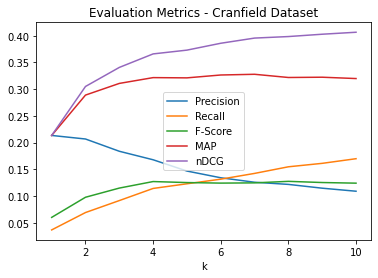

In [14]:
Model_VSM_BM25=EvaluateSystem(best_docs)